In [2]:
import pandas as pd
import numpy as np
from helper_functions import *
import matplotlib.pyplot as plt

In [157]:
data = pd.read_csv('C:/Users/sanam/Documents/SynD_180_CSV/5.csv', delimiter='\t', header= None, names=['timestamp', 'value'])

In [158]:
data

,timestamp,value
0,2019-09-29 00:00:00.000,0.0
1,2019-09-29 00:00:00.200,0.0
2,2019-09-29 00:00:00.400,0.0
3,2019-09-29 00:00:00.600,0.0
4,2019-09-29 00:00:00.800,0.0
...,...,...
77759995,2020-03-26 23:59:59.000,0.0
77759996,2020-03-26 23:59:59.200,0.0
77759997,2020-03-26 23:59:59.400,0.0
77759998,2020-03-26 23:59:59.600,0.0


In [159]:
# Convert the timestamp column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

In [160]:
data.set_index('timestamp', inplace=True)

In [161]:
data.dtypes

value    float64
dtype: object

In [162]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [163]:
nan_check = data.isnull().sum()
nan_check

value    0
dtype: int64

In [164]:
df_wms = data.resample('1S').mean()

In [165]:
df_wms

,value
timestamp,
2019-09-29 00:00:00,0.0
2019-09-29 00:00:01,0.0
2019-09-29 00:00:02,0.0
2019-09-29 00:00:03,0.0
2019-09-29 00:00:04,0.0
...,...
2020-03-26 23:59:55,0.0
2020-03-26 23:59:56,0.0
2020-03-26 23:59:57,0.0


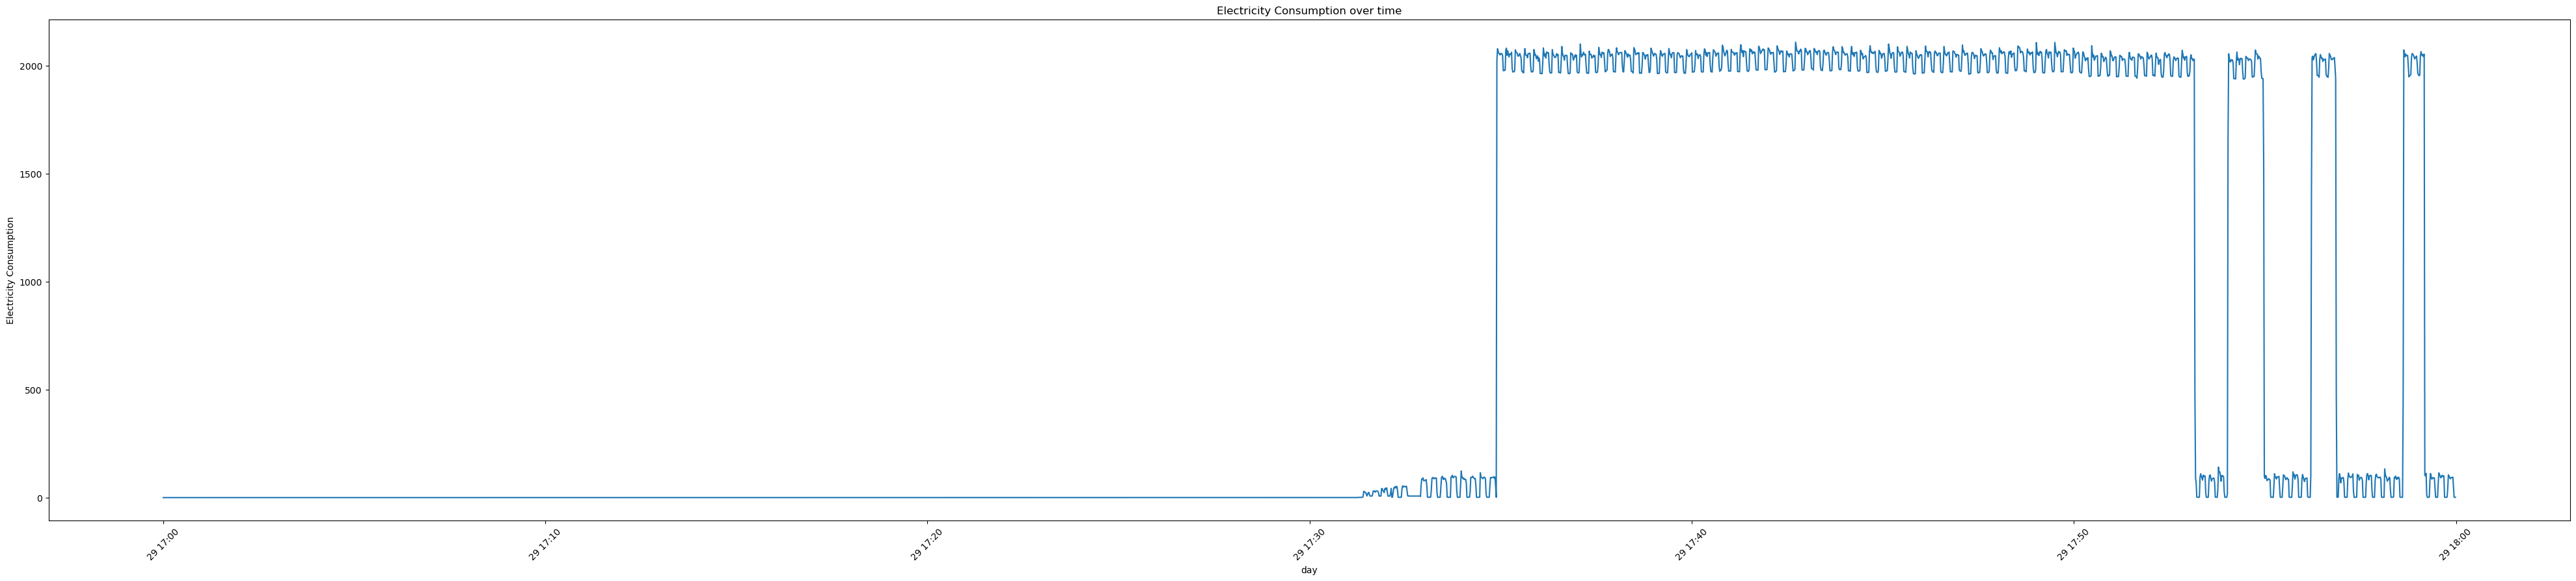

In [167]:
plot_usage(df_wms.loc['2019-09-29 17'])

In [170]:
df_wms_at = activation_times(df_wms)

ValueError: No objects to concatenate

In [145]:
df_wms_at

,power_consumption_before,power_consumption_during,power_consumption_after
2019-09-29 13:34:50,0.0,312.060000,1560.253448
2019-09-29 13:38:42,0.0,309.880000,1549.392241
2019-09-30 13:50:11,0.0,913.192320,1521.936000
2019-09-30 14:39:59,0.0,912.848640,1521.452800
2019-10-01 14:35:19,0.0,608.798316,1521.966316
...,...,...,...
2020-03-21 16:41:49,0.0,304.280000,1521.420930
2020-03-22 14:42:30,0.0,624.116604,1560.232075
2020-03-22 14:46:02,0.0,619.759434,1549.388679
2020-03-25 14:22:52,0.0,913.195983,1521.966527


In [109]:
df_mo_train = add_time_frame(df_mo_at)

In [110]:
df_mo_train

ti,0am-6am,6am-12pm,12pm-6pm,6pm-12am,day
2019-09-29,0,0,1,0,Sunday
2019-10-02,0,0,1,0,Wednesday
2019-10-05,0,0,1,0,Saturday
2019-10-07,0,0,1,0,Monday
2019-10-08,0,0,1,0,Tuesday
...,...,...,...,...,...
2020-03-18,0,1,0,0,Wednesday
2020-03-19,0,1,0,0,Thursday
2020-03-24,0,1,0,0,Tuesday
2020-03-25,0,1,0,0,Wednesday


In [111]:
pivot_mo = create_pivot_table(df_mo_train)

In [112]:
pivot_mo

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,2,6,1
Monday,0,3,7,2
Saturday,0,5,3,1
Sunday,0,5,5,1
Thursday,0,4,7,1
Tuesday,0,7,4,1
Wednesday,0,6,6,0


In [94]:
pivot_t

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,0,22,0
Monday,0,0,23,0
Saturday,0,0,20,0
Sunday,0,0,23,0
Thursday,0,0,23,0
Tuesday,0,0,25,0
Wednesday,0,0,26,0


In [76]:
pivot_mw

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,69,0,0
Monday,0,63,0,6
Saturday,0,67,0,0
Sunday,0,69,0,0
Thursday,0,65,0,3
Tuesday,0,67,0,0
Wednesday,0,63,0,0


In [55]:
pivot_wc

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,7,18,0
Monday,0,10,16,0
Saturday,0,4,21,0
Sunday,0,6,20,0
Thursday,0,2,24,0
Tuesday,0,7,19,0
Wednesday,0,6,20,0


In [37]:
pivot_cm

ti,0am-6am,12pm-6pm,6am-12pm,6pm-12am
day,,,,
Friday,0,5,16,0
Monday,0,9,6,0
Saturday,0,6,13,0
Sunday,0,7,7,0
Thursday,0,9,10,0
Tuesday,0,9,8,0
Wednesday,0,13,9,0


In [171]:
df_wms.to_csv('C:/Users/sanam/Documents/SynD_processed/washing_machine.csv')